Following https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [1]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from ml_algs.neural_nets.ybengio_03 import BengioNet

current_dir = %pwd

#### Prepare data

In [2]:
with open('./data/names.txt', 'r') as f:
    names = [line.strip() for line in f.readlines()]

In [3]:
char_to_int = {}
all_chars = ['.'] + sorted(list(set(''.join([''.join(n.lower().split(' ')) for n in names]))))
n_all_chars = len(all_chars)

char_to_int = {ch: i for i, ch in enumerate(all_chars)}
int_to_char = {v: k for k, v in char_to_int.items()}

In [4]:
n_context_letters = 3
X_first, Y_first = [], []
X_last, Y_last = [], []

for name in names:
    first_name, last_name = name.lower().split(' ')
    ctx_first = [0] * n_context_letters
    ctx_last = [0] * n_context_letters

    first_name += "."
    for ch in first_name:
        char_idx = char_to_int[ch]
        X_first.append(ctx_first)
        Y_first.append(char_idx)
        ctx_first = ctx_first[1:] + [char_idx]

    last_name += "."
    for ch in last_name:
        char_idx = char_to_int[ch]
        X_last.append(ctx_last)
        Y_last.append(char_idx)
        ctx_last = ctx_last[1:] + [char_idx]

X_first = torch.tensor(X_first)
Y_first = torch.tensor(Y_first)
X_last = torch.tensor(X_last)
Y_last = torch.tensor(Y_last)

In [5]:
Xtr_first, Xte_first, Ytr_first, Yte_first = train_test_split(X_first, Y_first, train_size=0.9)
Xtr_last, Xte_last, Ytr_last, Yte_last = train_test_split(X_last, Y_last, train_size=0.9)

#### Train models

In [6]:
nn_first = BengioNet(
    n_all_letters=n_all_chars, 
    n_context_letters=n_context_letters, 
    n_features=10, 
    n_hidden=200, 
    learning_rate=0.1,
    regularization_rate=0.01)

nn_first.train(Xtr_first, Ytr_first, batch_size=32, n_epochs=100000)

In [7]:
nn_last = BengioNet(
    n_all_letters=n_all_chars, 
    n_context_letters=n_context_letters, 
    n_features=14,
    n_hidden=200, 
    learning_rate=0.1,
    regularization_rate=0.01)

nn_last.train(Xtr_last, Ytr_last, batch_size=32, n_epochs=100000)

#### Evaluate loss

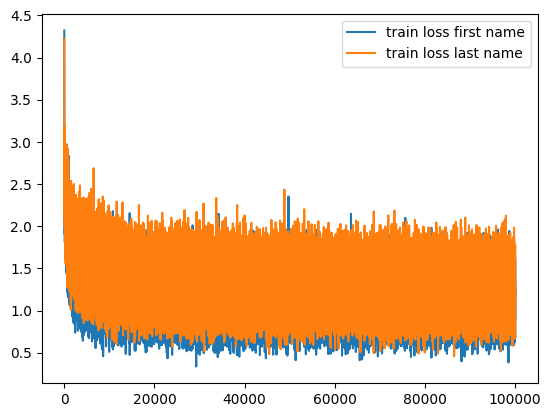

In [8]:
plt.plot(nn_first.losses, label='train loss first name')
plt.plot(nn_last.losses, label='train loss last name')
plt.legend()

In [9]:
probs = nn_first.eval(Xte_first)
nn_first.calculate_loss(probs, Yte_first)

tensor(1.1174, grad_fn=<AddBackward0>)

In [10]:
probs = nn_last.eval(Xte_last)
nn_last.calculate_loss(probs, Yte_last)

tensor(1.2649, grad_fn=<AddBackward0>)

#### Score model - generate new names

In [12]:
for _ in range(10):
    ctx_first = [0] * 3
    ctx_last = [0] * 3
    out = ""
    
    while True:
        probs = nn_first.eval(torch.tensor(ctx_first))
        idx = torch.multinomial(probs, num_samples=1).item()

        if idx == 0:
            break
        
        ctx_first = ctx_first[1:] + [idx]
        out += int_to_char[idx]

    out += " "

    while True:
        probs = nn_last.eval(torch.tensor(ctx_last))
        idx = torch.multinomial(probs, num_samples=1).item()

        if idx == 0:
            break
        
        ctx_last = ctx_last[1:] + [idx]
        out += int_to_char[idx]

    print(out)
        

williso jones
lisa clswy
rebecca adams
steph patter
joshua chard
steven ston
jidi guez
bette hendez
maurence gill
richolan robinson
